## Identification of best model using Cross validation 

Agenda:
1. Load the data from “glass.csv” and make a bar plot of different types of glasses.
2. Make a train_test split and fit a single decision tree classifier.
3. Make a k-fold split with 3 splits and measure the accuracy score with each split
4. Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.

In [3]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#### Read Glass.csv data file

In [4]:
df = pd.read_csv('glass.csv')
df.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


#### Bar plot of different types of glasses.

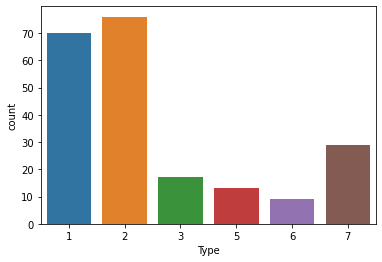

In [5]:
%matplotlib inline
import seaborn as sns
sns.countplot(x="Type", data=df)

In [6]:
#from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
#scaler = Normalizer().fit(X_train)
#min_max_scaler.fit_transform(X_train)


In [7]:
df_x1 = df.iloc[:,0:-1].values
scaler = MinMaxScaler()
df_x = scaler.fit_transform(df_x1)
df_x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [8]:
df_y = df.iloc[:,-1]
df_y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

#### Split train test data

In [9]:
train_X, test_X, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3)

#### Fit Module with Single decision tree classifier

In [10]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, train_X, train_y, cv=10)
clf.fit(train_X,train_y, sample_weight=None, check_input=True, X_idx_sorted=None)
clf.get_params(deep=True)

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [11]:
from sklearn.metrics import confusion_matrix
clf2 = DecisionTreeClassifier(max_depth=5).fit(train_X, train_y)
print('Accuracy of Decision Tree classifier on test set: {:.3f}'.format(clf2.score(test_X, test_y)))
arr=confusion_matrix(test_y, clf2.predict(test_X, check_input=True))
df=pd.DataFrame(arr)
print(df)

Accuracy of Decision Tree classifier on test set: 0.631
    0   1  2  3  4  5
0  15   1  0  0  0  1
1   8  14  1  1  1  0
2   3   2  3  0  0  0
3   0   0  0  1  0  1
4   2   2  0  0  0  0
5   0   1  0  0  0  8


In [12]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

In [13]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(train_X, train_y)
y_pred = model.predict(test_X)
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.4461538461538462


####  Creating k-fold split with 3 splits

In [14]:
kfold = model_selection.KFold(n_splits=3, random_state=7)
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(train_X, train_y)
results = model_selection.cross_val_score(abc, df_x, df_y, cv=kfold)
results.mean()

c:\program files\python37\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.056207616066771

#### Finding suitable number of estimators for RandomForestClassifer

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(df_x, df_y)

print(rf_random.best_params_)


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.3s finished


{'n_estimators': 118, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
